<a href="https://colab.research.google.com/github/YuriVSA/DataScience-Estudos/blob/main/Exerc%C3%ADcio_Classificac%CC%A7a%CC%83o_Pre%CC%81_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Antes de qualquer coisa, conecte o Colab ao seu Drive, para salvar os artefatos do notebook diretamente em uma pasta do Drive, assim você não precisa fazer o upload desses arquivos para os outros notebooks.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

DRIVE_DIRECTORY = "Curso_DataScience" # aqui defina o nome/caminho da pasta no seu Drive que vai armazenar os arquivos.
DRIVE_DIRECTORY = os.path.join("/content/drive/MyDrive", DRIVE_DIRECTORY)
if not os.path.exists(DRIVE_DIRECTORY):
    os.makedirs(DRIVE_DIRECTORY) # a pasta será criada se não existir



---



In [4]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Base de dados cobertura vegetal

## Download e preparação dos dados

Neste exercício, você vai utilizar um dataset real. Nesta primeira etapa, ao invés de carregar um arquivo no ambiente de computação, nós vamos fazer o download e a preparação dos dados, utilizando uma função do Scikit-Learn.

Se você não quiser fazer essa parte, pode simplesmente rodar essa seção e ir direto para os exercícios!

Documentação do dataset: https://archive.ics.uci.edu/dataset/31/covertype

Documentação da função do Scikit-Learn: https://scikit-learn.org/stable/datasets/real_world.html#covtype-dataset

> As amostras neste conjunto de dados correspondem a trechos de 30×30m de floresta nos EUA, coletados para a tarefa de prever o tipo de cobertura de cada trecho, ou seja, a espécie dominante de árvore. Existem sete tipos de cobertura, tornando este um problema de classificação multiclasse. Cada amostra possui 54 características, descritas na página inicial do conjunto de dados. Algumas das características são indicadores booleanos, enquanto outras são medições discretas ou contínuas.
>
> **Características do Conjunto de Dados:**
>
> - **Classes:** 7  
> - **Total de amostras:** 581012  
> - **Dimensionalidade:** 54  
> - **Características:** Inteiras  


In [ ]:
data = fetch_covtype(as_frame=True).frame
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Perceba que este dataframe contém 55 colunas, sendo que a última (`Cover_Type`) corresponde à variável alvo.

Neste dataset, alguns atributos categóricos já vêm no formato One Hot Encoded, mais especificamente aqueles relacionados a `Wilderness_Area` e `Soil_Type`. Para que você possa praticar a aplicação da técnica de One Hot Encoding, nas duas próximas células nós estamos "desfazendo" esta formatação. Não se preocupe muito com o código, mas se você quiser entender melhor o que está acontecendo, recomendamos utilizar o recurso *Explicar o código* do Gemini no Google Colab:

> 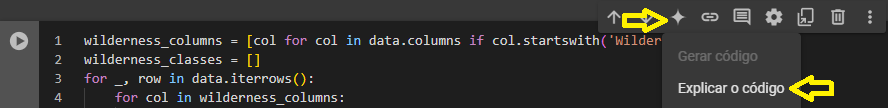

In [ ]:
wilderness_columns = [col for col in data.columns if col.startswith('Wilderness_Area')]
wilderness_classes = []
for _, row in data.iterrows():
    for col in wilderness_columns:
        if row[col] == 1:
            wilderness_classes.append(int(col.split('_')[-1]))
            break
data.drop(columns=wilderness_columns, inplace=True)
data.insert(len(data.columns)-1, 'Wilderness_Area', wilderness_classes)

In [ ]:
soil_type_columns = [col for col in data.columns if col.startswith('Soil_Type')]
soil_type_classes = []
for _, row in data.iterrows():
    for col in soil_type_columns:
        if row[col] == 1:
            soil_type_classes.append(int(col.split('_')[-1]))
            break
data.drop(columns=soil_type_columns, inplace=True)
data.insert(len(data.columns)-1, 'Soil_Type', soil_type_classes)

A variável alvo, `Cover_Type`, também já está no formato Label Encoded. Vamos converter para o nome original das plantas, utilizando a informação presente na documentação do dataset:

> Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation
>
> Class Labels: Spruce/Fir, Lodgepole Pine, Ponderosa Pine, Cottonwood/Willow, Aspen, Douglas-fir, Krummholz

In [ ]:
class_labels = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]
class_labels_dict = {i: label for i, label in enumerate(class_labels, start=1)}
data['Cover_Type'] = data['Cover_Type'].map(class_labels_dict)

Uma última etapa: este dataset é bastante extenso, contendo 581012 linhas. Alguns algoritmos podem levar muito tempo para treinar com tantos dados, e algumas técnicas que vamos utilizar treinam o algoritmo mais de uma vez. Então, vamos limitar este estudo a 10000 exemplos, amostrados aleatoriamente a partir da base completa.

In [ ]:
data = data.sample(10000, random_state=0)

Finalmente, vamos salvar os dados em um arquivo, para você utilizar como base neste e em outros exercícios.

In [ ]:
data.to_csv(os.path.join(DRIVE_DIRECTORY, 'cov_types.csv'), index=False)

## Exploração dos dados

Carregue os dados a partir do arquivo csv, em um dataframe do Pandas.

In [142]:
base = pd.read_csv(os.path.join(DRIVE_DIRECTORY, "cov_types.csv"))

Exiba os dados para uma inspeção inicial.

In [143]:
base

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine


Exiba as 10 primeiras entradas da base.

In [129]:
base.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
5,2656.0,20.0,9.0,323.0,73.0,1082.0,214.0,221.0,143.0,1036.0,0,11,Lodgepole Pine
6,2992.0,105.0,36.0,201.0,141.0,1211.0,252.0,170.0,12.0,1584.0,2,32,Spruce/Fir
7,3110.0,32.0,14.0,379.0,43.0,5028.0,216.0,208.0,125.0,2845.0,0,29,Spruce/Fir
8,3242.0,40.0,15.0,85.0,19.0,3330.0,220.0,207.0,118.0,3164.0,2,23,Lodgepole Pine
9,3025.0,273.0,10.0,391.0,24.0,2797.0,192.0,243.0,190.0,234.0,0,21,Spruce/Fir


Exiba as 10 últimas entradas da base.

In [130]:
base.tail(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
9990,2788.0,20.0,9.0,30.0,2.0,3555.0,214.0,221.0,143.0,2984.0,0,22,Spruce/Fir
9991,2899.0,84.0,17.0,85.0,21.0,1176.0,242.0,208.0,90.0,1664.0,0,29,Lodgepole Pine
9992,3517.0,270.0,5.0,459.0,70.0,1445.0,207.0,241.0,173.0,1937.0,1,39,Krummholz
9993,2942.0,351.0,10.0,391.0,29.0,5337.0,203.0,224.0,159.0,2105.0,0,28,Lodgepole Pine
9994,2055.0,327.0,19.0,30.0,14.0,532.0,169.0,215.0,183.0,684.0,3,13,Douglas-fir
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine
9999,2682.0,91.0,13.0,162.0,32.0,1369.0,240.0,219.0,108.0,1661.0,2,10,Lodgepole Pine


Exiba as estatísticas básicas da base.

In [131]:
base.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2966.946400,153.860000,14.148400,270.744400,46.610200,2357.047800,212.520300,223.253900,141.993600,1986.776600,1.107900,23.584100
std,278.877757,111.313091,7.467714,211.481433,58.188252,1564.031388,26.642597,19.851419,38.458979,1324.588532,1.058097,9.413001
min,1893.000000,0.000000,0.000000,0.000000,-132.000000,0.000000,60.000000,104.000000,0.000000,0.000000,0.000000,0.000000
25%,2820.000000,58.000000,9.000000,108.000000,7.000000,1092.000000,199.000000,213.000000,119.000000,1034.000000,0.000000,19.000000
50%,3004.000000,125.000000,13.000000,218.000000,30.000000,2012.000000,218.000000,226.000000,143.000000,1711.000000,1.000000,28.000000
75%,3167.000000,255.000000,18.000000,390.000000,69.000000,3347.000000,231.000000,237.000000,168.000000,2556.000000,2.000000,30.000000
max,3845.000000,360.000000,55.000000,1376.000000,573.000000,6926.000000,254.000000,254.000000,250.000000,7150.000000,3.000000,39.000000


## Visualização dos dados

Exiba o nome das categorias de tipo de cobertura vegetal e sua frequência.

In [114]:
np.unique(base["Cover_Type"], return_counts=True)

(array(['Aspen', 'Cottonwood/Willow', 'Douglas-fir', 'Krummholz',
        'Lodgepole Pine', 'Ponderosa Pine', 'Spruce/Fir'], dtype=object),
 array([ 163,   55,  278,  362, 4847,  581, 3714]))

Exiba a mesma informação, mas como um gráfico de barras.

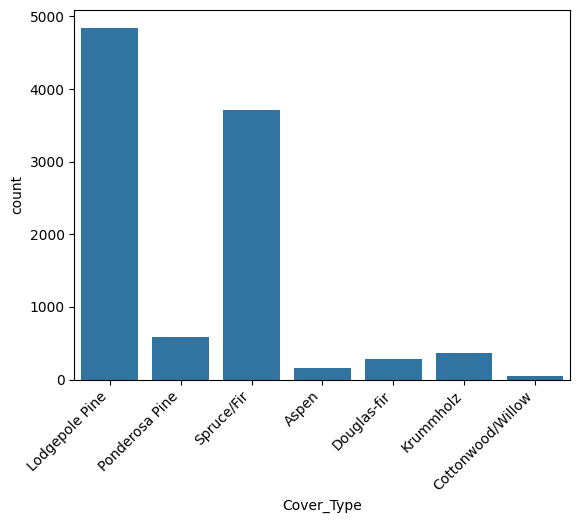

In [115]:
sns.countplot(x= base["Cover_Type"])
# Mantenha a próxima linha para rotacionar os rótulos e facilitar sua leitura
plt.xticks(rotation=45, ha='right');

Exiba um histograma para as variáveis numéricas (`Elevation` até `Horizontal_Distance_To_Fire_Points`).

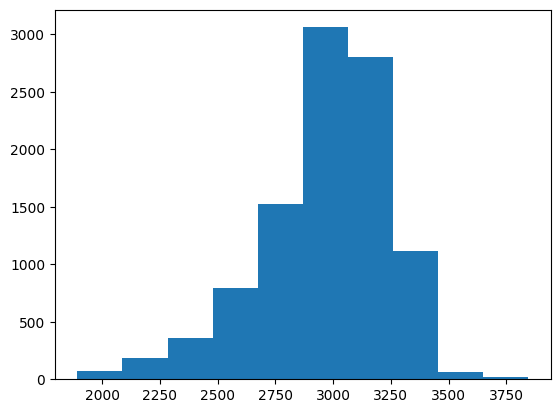

In [116]:
plt.hist(x= base["Elevation"]);

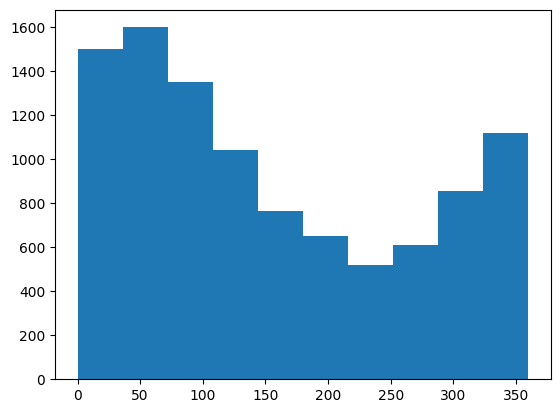

In [117]:
plt.hist(x= base["Aspect"]);

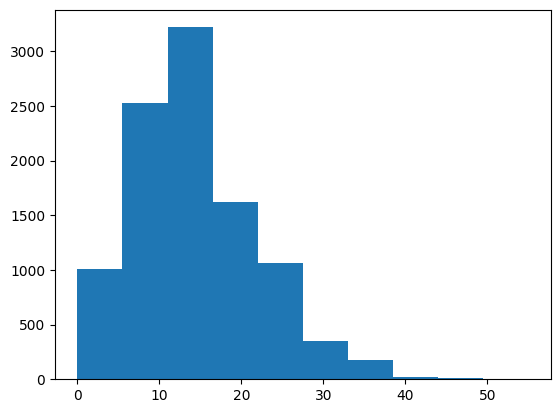

In [118]:
plt.hist(x= base["Slope"]);

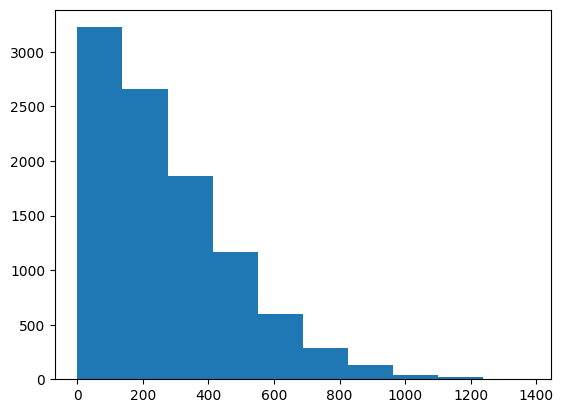

In [119]:
plt.hist(x= base['Horizontal_Distance_To_Hydrology']);

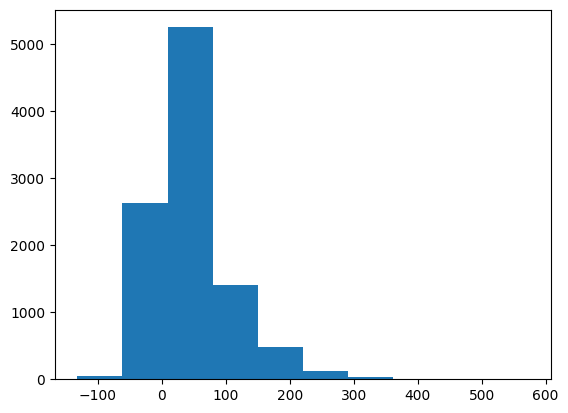

In [120]:
plt.hist(x= base['Vertical_Distance_To_Hydrology']);

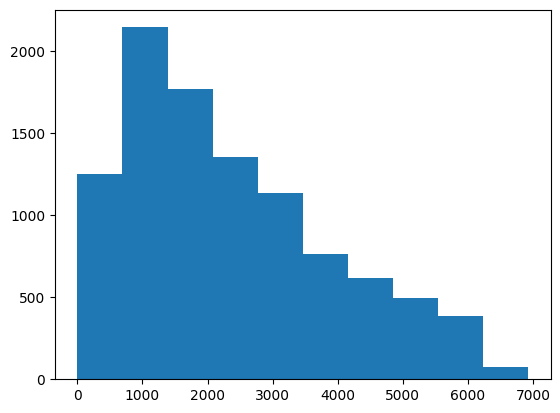

In [121]:
plt.hist(x = base["Horizontal_Distance_To_Roadways"]);

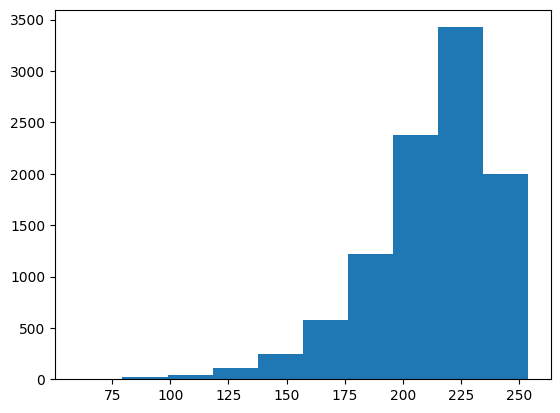

In [122]:
plt.hist(x = base["Hillshade_9am"]);

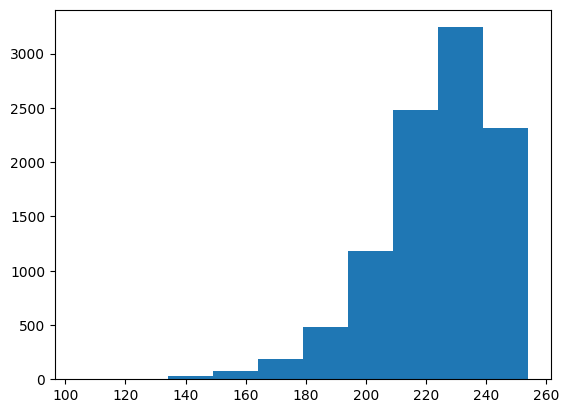

In [123]:
plt.hist(x = base['Hillshade_Noon']);

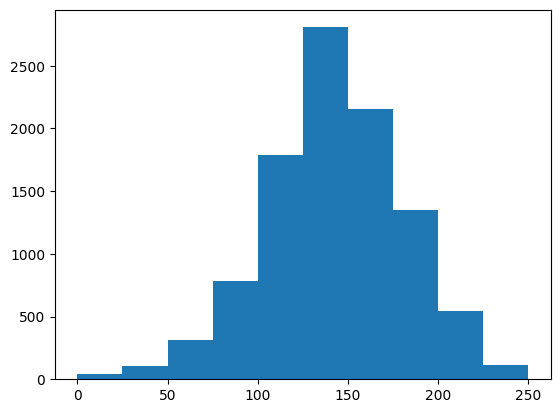

In [124]:
plt.hist(x = base['Hillshade_3pm']);

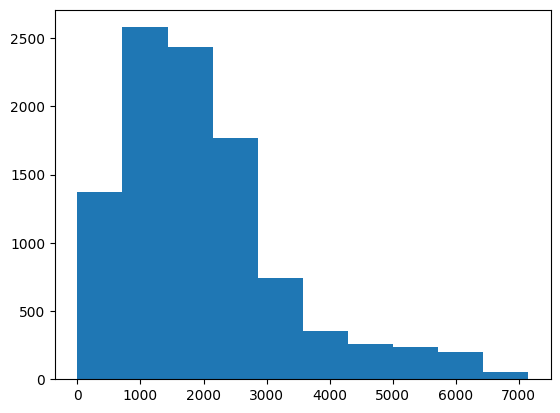

In [125]:
plt.hist(x = base['Horizontal_Distance_To_Fire_Points']);

Exiba um grid com gráficos de correlação entre as variáveis numéricas. Use `Cover_Type` para codificar as cores.

In [126]:
fig = px.scatter_matrix(base,
             dimensions=["Elevation", "Slope", "Aspect"],
             color="Cover_Type")
fig.show()

## Divisão entre previsores e classe

Separe as variáveis preditoras em uma variável `X`, no formato de NumPy array. Como a variável alvo é a última coluna, você pode selecionar as variáveis preditoras com a notação `:-1`, que significa "desde o início até o penúltimo".

In [144]:
X = base.iloc[:, :-1].values

Exiba estes valores.

In [145]:
X

array([[2.767e+03, 6.600e+01, 1.700e+01, ..., 2.251e+03, 2.000e+00,
        3.000e+01],
       [2.724e+03, 1.600e+02, 1.900e+01, ..., 2.514e+03, 2.000e+00,
        1.600e+01],
       [2.360e+03, 6.500e+01, 7.000e+00, ..., 3.390e+02, 3.000e+00,
        5.000e+00],
       ...,
       [3.052e+03, 7.900e+01, 1.900e+01, ..., 1.490e+03, 2.000e+00,
        2.200e+01],
       [2.958e+03, 5.800e+01, 6.000e+00, ..., 2.280e+03, 0.000e+00,
        2.800e+01],
       [2.682e+03, 9.100e+01, 1.300e+01, ..., 1.661e+03, 2.000e+00,
        1.000e+01]])

Separe a variável alvo em uma variável `y`, também como NumPy array. Você também pode usar a notação `-1`, que neste contexto significa "última coluna".

In [146]:
y = base.iloc[:, -1].values

Exiba os valores.

In [147]:
y

array(['Lodgepole Pine', 'Lodgepole Pine', 'Ponderosa Pine', ...,
       'Spruce/Fir', 'Lodgepole Pine', 'Lodgepole Pine'], dtype=object)

## Tratamento da variável alvo (LabelEncoder)

De acordo com a [documentação mais recente](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), o `LabelEncoder` "deve ser usado para codificar os valores alvo, ou seja `y`, e não a entrada `X`". Isso porque os valores retornados são apenas rótulos, não tendo significado numérico, portanto não sendo úteis para treinar algoritmos. O mesmo se aplica à variável `y`, mas ela pode ser apresentada aos algoritmos do Scikit-Learn no formato *label encoded* porque, internamente, os algoritmos fazem a transformação seguinte, convertendo os rótulos numéricos no formato *one hot encoded*, antes de iniciar os cálculos.

Use a classe `LabelEncoder` para codificar a variável `y`.

In [148]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Exiba os novos valores de `y`.

In [149]:
y

array([4, 4, 5, ..., 6, 4, 4])

## Tratamento das variáveis preditoras (StandardScaler e OneHotEncoder)

A variável `X` agora contém 12 colunas, sendo aquelas de índice 0 a 9 numéricas, e as de índice 10 e 11 categóricas.

Para dar seguimento ao processamento, as variáveis numéricas devem ser escalonadas, e as variáveis categóricas devem ser transformadas usando One Hot Encoding.

Nós podemos fazer essas duas operações de uma única vez, passando ambos os transformadores para a classe `ColumnTransformer`.

Crie este encoder, usando dois transformadores. O primeiro deve ser uma instância de `StandardScaler`, e deve receber os índices das colunas numéricas (dica: ao invés de passar uma lista de inteiros, você pode indicar os índices com o construtor `slice(0, 10)`, que corresponde a extrair aos índices `[0:10]`), e o segundo deve ser uma instância de `OneHotEncoder`, recebendo os índices das colunas categóricas. Ao construtor de `OneHotEncoder`, informe o parâmetro `sparse_output=False`, para garantir que o resultado não seja expresso como uma matriz esparsa. Como neste caso todas as colunas estão sendo transformadas, o parâmetro `remainder` de `ColumnTransformer` não é necessário.

Em seguida, transforme `X` usando este encoder.

In [150]:
X_encoder = ColumnTransformer(
    transformers=[
    ('StandardScaler', StandardScaler(), slice(0, 10)),
    ('OneHotEncoder', OneHotEncoder(sparse_output=False), [10,11])
    ]
)
X = X_encoder.fit_transform(X)

Exiba os novos valores de `X`.

In [151]:
X

array([[-0.71700375, -0.78934465,  0.38187624, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87120088,  0.05516249,  0.6497092 , ...,  0.        ,
         0.        ,  0.        ],
       [-2.17649753, -0.79832877, -0.95728858, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.30500049, -0.67255111,  0.6497092 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.03208161, -0.8612176 , -1.09120506, ...,  0.        ,
         0.        ,  0.        ],
       [-1.02181203, -0.56474169, -0.15378969, ...,  0.        ,
         0.        ,  0.        ]])

In [152]:
X[0]

array([-0.71700375, -0.78934465,  0.38187624, -0.28724714, -0.49170803,
       -0.74621658,  0.80625677, -0.96994893, -1.19597298,  0.19948581,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [153]:
X.shape

(10000, 53)

## Divisão em split de treinamento e teste

Separe as variáveis `X` e `y` em splits para treinamento e teste. Use uma fração de 25% para teste. Fixe a semente de números aleatórios, informando o parâmetro `random_state=0`.

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Exiba as dimensões das variáveis do split de treinamento, acessando o atributo `shape`.

In [155]:
X_train.shape, y_train.shape

((7500, 53), (7500,))

Faça o mesmo para o split de teste.

In [156]:
X_test.shape, y_test.shape

((2500, 53), (2500,))

## Salvar as variáveis

Salve as variáveis preditoras e alvo, dos dois splits, em um único arquivo `pickle` com o nome `cover_type.pkl`. A ordem deve ser: primeiro split de treinamento (`X` e `y`), depois split de teste (`X` e `y`).

In [139]:
with open(os.path.join(DRIVE_DIRECTORY, "cover_type.pkl"), "wb") as f:
    pickle.dump((X_train, y_train, X_test, y_test), f)